In [2]:
# Caso for trabalhar com Dashbords
#!pip install dash

  Using cached dash-2.6.2-py3-none-any.whl (9.8 MB)
  Using cached dash_core_components-2.0.0-py3-none-any.whl (3.8 kB)
  Using cached Flask_Compress-1.13-py3-none-any.whl (7.9 kB)
  Using cached dash_html_components-2.0.0-py3-none-any.whl (4.1 kB)
  Using cached dash_table-5.0.0-py3-none-any.whl (3.9 kB)


Importando as bibliotecas necessárias

In [3]:
#from dash import Dash, html, dcc
import pandas as pd
import numpy as np
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go 
import re
import matplotlib.pyplot as plt

Lendo Dados do site do Ministério da Saúde.
Link para download dos dados: https://covid.saude.gov.br/

In [167]:
df2 = pd.read_csv("C:\Projetos\Previsão de Evolução do COVID-19\data\HIST_PAINEL_COVIDBR_14out2022\HIST_PAINEL_COVIDBR_2022_Parte1_14out2022.csv", sep=";" )
df3 = pd.read_csv("C:\Projetos\Previsão de Evolução do COVID-19\data\HIST_PAINEL_COVIDBR_14out2022\HIST_PAINEL_COVIDBR_2022_Parte2_14out2022.csv", sep=";" )
df = pd.concat([df2, df3], ignore_index=True)

In [181]:
#Função para corrigir o label das Colunas
def corrige_colunas(col_names):
  return re.sub(r"[/| ]", "", col_names).lower()

df.columns = [corrige_colunas(col) for col in df.columns]

In [182]:
df_estados = df[(~df["estado"].isna()) & (df["municipio"].isna())]

In [183]:
df_estados['casosacumulado'].max()

6120384.0

Foi observado que existe para cada dia dois lançamentos de informação, um para o CODMUN=NaN e outro para o CODMUN=350000.0 e isso se repete para os demais estados. 

In [18]:
df_estados.loc[df_estados.estado == 'SP']

,regiao,estado,municipio,coduf,codmun,codregiaosaude,nomeregiaosaude,data,semanaepi,populacaotcu2019,casosacumulado,casosnovos,obitosacumulado,obitosnovos,recuperadosnovos,emacompanhamentonovos,interiormetropolitana
3620,Sudeste,SP,NaN,35,NaN,NaN,NaN,2022-01-01,52,45919049.0,4456469.0,361,155213,8,NaN,NaN,NaN
3621,Sudeste,SP,NaN,35,NaN,NaN,NaN,2022-01-02,1,45919049.0,4456581.0,112,155216,3,NaN,NaN,NaN
3622,Sudeste,SP,NaN,35,NaN,NaN,NaN,2022-01-03,1,45919049.0,4456745.0,164,155216,0,NaN,NaN,NaN
3623,Sudeste,SP,NaN,35,NaN,NaN,NaN,2022-01-04,1,45919049.0,4458689.0,1944,155242,26,NaN,NaN,NaN
3624,Sudeste,SP,NaN,35,NaN,NaN,NaN,2022-01-05,1,45919049.0,4461651.0,2962,155277,35,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1368000,Sudeste,SP,NaN,35,350000.0,NaN,NaN,2022-10-10,41,NaN,199.0,0,0,0,NaN,NaN,NaN
1368001,Sudeste,SP,NaN,35,350000.0,NaN,NaN,2022-10-11,41,NaN,200.0,1,0,0,NaN,NaN,NaN
1368002,Sudeste,SP,NaN,35,350000.0,NaN,NaN,2022-10-12,41,NaN,399.0,199,0,0,NaN,NaN,NaN
1368003,Sudeste,SP,NaN,35,350000.0,NaN,NaN,2022-10-13,41,NaN,200.0,-199,0,0,NaN,NaN,NaN


In [26]:
df_estados[(df_estados.data == '2022-03-11') & (df_estados.estado == 'SP')]

,regiao,estado,municipio,coduf,codmun,codregiaosaude,nomeregiaosaude,data,semanaepi,populacaotcu2019,casosacumulado,casosnovos,obitosacumulado,obitosnovos,recuperadosnovos,emacompanhamentonovos,interiormetropolitana
3689,Sudeste,SP,NaN,35,NaN,NaN,NaN,2022-03-11,10,45919049.0,5112728.0,12183,165981,103,NaN,NaN,NaN
599179,Sudeste,SP,NaN,35,350000.0,NaN,NaN,2022-03-11,10,NaN,128.0,0,0,0,NaN,NaN,NaN


Desta forma foi utilizado os dados apenas que continha 'NaN' no atributo CODMUN.

In [65]:
px.line(df_estados.loc[(df_estados.estado == 'SP') & (df_estados.codmun.isna())], x= 'data', y= 'casosacumulado', title='Crescimento de Casos em São Paulo')

In [67]:
px.line(df_estados.loc[(df_estados.estado == 'RN') & (df_estados.codmun.isna())], x= 'data', y= 'casosacumulado', title='Crescimento de Casos no Rio Grande do Norte')

In [70]:
px.line(df_estados.loc[(df_estados.estado == 'RN') & (df_estados.codmun.isna())], x= 'data', y= 'obitosnovos', title='Óbitos diário no Rio Grande do Norte')

In [63]:
px.line(df_estados[(df_estados['codmun'].isna()) & (df_estados['estado']=='RN')], x= 'data', y= 'casosnovos', title='Novos Casos Diário do Rio Grande do Norte')

In [64]:
px.line(df_estados[(df_estados['codmun'].isna()) & (df_estados['estado']=='RJ')], x= 'data', y= 'casosnovos', title='Novos Casos Diário do Rio de Janeiro')

Buscando saber qual estado teve maior porcentagem de mortes

In [88]:
df_estados['populacaotcu2019'].unique()

array([ 1777225.,   881935.,  4144597.,   605761.,  8602865.,   845731.,
        1572866.,  7075181.,  3273227.,  9132078.,  3506853.,  4018127.,
        9557071.,  3337357.,  2298696., 14873064., 21168791.,  4018650.,
       17264943., 45919049., 11433957.,  7164788., 11377239.,  2778986.,
        3484466.,  7018354.,  3015268.,       nan])

In [110]:
Populacao_SP = df_estados.loc[df_estados['estado']=='SP']['populacaotcu2019'].max()
Mortes_SP = df_estados.loc[df_estados['estado']=='SP']['obitosacumulado'].max()
print(f'População de São Paulo: {Populacao_SP}')
print(f'Numero de Obitos em São Paulo: {Mortes_SP}')
print(f'Relação MorteXPopulação: {round((Mortes_SP/Populacao_SP),4)}%')

População de São Paulo: 45919049.0
Numero de Obitos em São Paulo: 175252
Relação MorteXPopulação: 0.0038%


In [120]:
Populacao_RN = df_estados.loc[df_estados['estado']=='RN']['populacaotcu2019'].max()
Mortes_RN = df_estados.loc[df_estados['estado']=='RN']['obitosacumulado'].max()
print(f'População do Rio Grande do Norte: {Populacao_RN}')
print(f'Numero de Obitos no Rio Grande do Norte: {Mortes_RN}')
print(f'Relação MorteXPopulação: {round((Mortes_RN/Populacao_RN),4)}%')

População do Rio Grande do Norte: 3506853.0
Numero de Obitos no Rio Grande do Norte: 8470
Relação MorteXPopulação: 0.0024%


In [121]:
df_14102022 = df_estados.loc[(df_estados['data']=='2022-10-14') & (df_estados['codmun'].isna())]

In [124]:
dicionario = {}
for i in df_14102022.index:
    dicionario.update({df_14102022['estado'][i]:df_14102022['obitosacumulado'][i]})
    

In [125]:
dicionario

{'RO': 7361,
 'AC': 2029,
 'AM': 14341,
 'RR': 2174,
 'PA': 18873,
 'AP': 2164,
 'TO': 4205,
 'MA': 10993,
 'PI': 7956,
 'CE': 27729,
 'RN': 8470,
 'PB': 10404,
 'PE': 22348,
 'AL': 7128,
 'SE': 6440,
 'BA': 30737,
 'MG': 63835,
 'ES': 14827,
 'RJ': 75758,
 'SP': 175252,
 'PR': 45374,
 'SC': 22415,
 'RS': 41153,
 'MS': 10838,
 'MT': 14950,
 'GO': 27559,
 'DF': 11831}

In [53]:
rn = df_estados.loc[(df_estados.estado == 'RN') & (df_estados.codmun.isna())]

In [56]:
rn.loc[df.data == '2022-01-01']

,regiao,estado,municipio,coduf,codmun,codregiaosaude,nomeregiaosaude,data,semanaepi,populacaotcu2019,casosacumulado,casosnovos,obitosacumulado,obitosnovos,recuperadosnovos,emacompanhamentonovos,interiormetropolitana
1991,Nordeste,RN,NaN,24,NaN,NaN,NaN,2022-01-01,52,3506853.0,387352.0,150,7572,0,NaN,NaN,NaN


In [61]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=rn['data'], y=rn['obitosacumulado'],
              name="Mortes Acumuladas", mode="lines+markers", line = {'color':'blue'})
)

Taxa de Crescimento

In [166]:
df = df_estados.loc[~df_estados.codmun.isna()]
df

,regiao,estado,municipio,coduf,codmun,codregiaosaude,nomeregiaosaude,data,semanaepi,populacaotcu2019,casosacumulado,casosnovos,obitosacumulado,obitosnovos,recuperadosnovos,emacompanhamentonovos,interiormetropolitana
181,Norte,RO,NaN,11,NaN,NaN,NaN,2022-01-01,52,1777225.0,284660.0,34,6737,3,NaN,NaN,NaN
182,Norte,RO,NaN,11,NaN,NaN,NaN,2022-01-02,1,1777225.0,284692.0,32,6739,2,NaN,NaN,NaN
183,Norte,RO,NaN,11,NaN,NaN,NaN,2022-01-03,1,1777225.0,284783.0,91,6742,3,NaN,NaN,NaN
184,Norte,RO,NaN,11,NaN,NaN,NaN,2022-01-04,1,1777225.0,285037.0,254,6745,3,NaN,NaN,NaN
185,Norte,RO,NaN,11,NaN,NaN,NaN,2022-01-05,1,1777225.0,285269.0,232,6748,3,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020002,Centro-Oeste,DF,NaN,53,NaN,NaN,NaN,2022-10-10,41,3015268.0,839547.0,67,11831,0,NaN,NaN,NaN
1020003,Centro-Oeste,DF,NaN,53,NaN,NaN,NaN,2022-10-11,41,3015268.0,839623.0,76,11831,0,NaN,NaN,NaN
1020004,Centro-Oeste,DF,NaN,53,NaN,NaN,NaN,2022-10-12,41,3015268.0,839623.0,0,11831,0,NaN,NaN,NaN
1020005,Centro-Oeste,DF,NaN,53,NaN,NaN,NaN,2022-10-13,41,3015268.0,839703.0,80,11831,0,NaN,NaN,NaN


In [189]:
rn

,regiao,estado,municipio,coduf,codmun,codregiaosaude,nomeregiaosaude,data,semanaepi,populacaotcu2019,casosacumulado,casosnovos,obitosacumulado,obitosnovos,recuperadosnovos,emacompanhamentonovos,interiormetropolitana
1991,Nordeste,RN,NaN,24,NaN,NaN,NaN,2022-01-01,52,3506853.0,387352.0,150,7572,0,NaN,NaN,NaN
1992,Nordeste,RN,NaN,24,NaN,NaN,NaN,2022-01-02,1,3506853.0,387375.0,23,7572,0,NaN,NaN,NaN
1993,Nordeste,RN,NaN,24,NaN,NaN,NaN,2022-01-03,1,3506853.0,387542.0,167,7573,1,NaN,NaN,NaN
1994,Nordeste,RN,NaN,24,NaN,NaN,NaN,2022-01-04,1,3506853.0,387919.0,377,7577,4,NaN,NaN,NaN
1995,Nordeste,RN,NaN,24,NaN,NaN,NaN,2022-01-05,1,3506853.0,388313.0,394,7580,3,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018306,Nordeste,RN,NaN,24,NaN,NaN,NaN,2022-10-10,41,3506853.0,557244.0,49,8470,0,NaN,NaN,NaN
1018307,Nordeste,RN,NaN,24,NaN,NaN,NaN,2022-10-11,41,3506853.0,557281.0,37,8470,0,NaN,NaN,NaN
1018308,Nordeste,RN,NaN,24,NaN,NaN,NaN,2022-10-12,41,3506853.0,557281.0,0,8470,0,NaN,NaN,NaN
1018309,Nordeste,RN,NaN,24,NaN,NaN,NaN,2022-10-13,41,3506853.0,557297.0,16,8470,0,NaN,NaN,NaN


In [187]:
def taxa_crescimento(df, variable, start_date=None, end_date=None):
    if start_date == None:
        start_date = df.data.loc[df[variable] > 0].min()
    else:
        start_date = pd.to_datetime(start_date)
   
    if end_date == None:
        end_date = df.data.iloc[-1]
    else:
        end_date = pd.to_datetime(end_date)
        
    #Define os valores do presente e passado
    passado = df.loc[df.data == start_date, variable].values[0]
    presente = df.loc[df.data == end_date, variable].values[0]
    
    #Define o numero de tempo que iremos avaliar
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    n = (end_date - start_date).days
    
    # Calcula a taxa
    taxa = (presente/passado)**(1/n)-1
    
    return taxa * 100

In [188]:
# Taxa de crescimento médio do COVID-19 no Brasil em todo o periodo
taxa_crescimento(df, 'casosacumulado' )

0.15532049751962873

In [191]:
def taxa_crescimento_diario(df, variable, start_date=None):
    if start_date == None:
        start_date = df.data.loc[df[variable] > 0].min()
    else:
        start_date = pd.to_datetime(start_date)
        
    end_date = df.data.max()
    
    # Define o numero de pontos que se quer avaliar
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    n = (end_date - start_date).days
    print(f'Número de dia: {n}.')
    
    # Taxa calculada de um dia para o outro
    taxas = list(map(
        lambda x: (df[variable].iloc[x] - df[variable].iloc[x-1]) / df[variable].iloc[x-1],
        range(1, n+1)
    ))
    
    return np.array(taxas) * 100

In [194]:
tx_diaria = taxa_crescimento_diario(rn, 'casosacumulado')

Número de dia: 286.


In [195]:
tx_diaria

array([5.93775171e-03, 4.31106809e-02, 9.72797787e-02, 1.01567595e-01,
       1.41123269e-01, 1.30123617e-01, 1.84145035e-01, 5.81925944e-02,
       1.84468283e-02, 1.52158265e-01, 1.69063653e-01, 2.49209729e-01,
       3.44103878e-01, 1.16761641e-02, 7.10640058e-02, 3.44922912e-02,
       3.08802389e-01, 4.31447383e-01, 4.68350480e-01, 3.60709696e-01,
       6.65912897e-01, 3.69680726e-01, 2.34676838e-02, 6.44592462e-01,
       7.96040411e-01, 1.13740107e+00, 1.07165295e+00, 8.62140824e-01,
       3.07434387e-01, 2.49289677e-01, 6.49030446e-01, 5.84186828e-01,
       8.05781961e-01, 6.45869381e-01, 6.80132140e-01, 0.00000000e+00,
       4.64361134e-01, 4.16332343e-01, 9.50758198e-01, 5.29987670e-01,
       6.26555299e-01, 5.83200905e-01, 2.46960112e-01, 7.27907038e-02,
       6.06803274e-01, 5.56898045e-01, 5.63961723e-01, 3.25272026e-01,
       3.03672966e-01, 1.91381231e-01, 5.06819706e-02, 4.84001762e-01,
       3.46107980e-01, 3.08607446e-01, 2.50840167e-01, 1.62680129e-01,
      

In [198]:
dia_1 = rn.data.loc[rn.casosacumulado > 0].min()

px.line(x=pd.date_range(dia_1, rn.data.max())[1:], 
       y=tx_diaria, title='Taxa de Crescimento de Casos Confirmados no Brasil')

# Predições

In [199]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [218]:
CasosConfirmados = rn.casosacumulado
CasosConfirmados.index = pd.to_datetime(rn.data)
CasosConfirmados

data
2022-01-01    387352.0
2022-01-02    387375.0
2022-01-03    387542.0
2022-01-04    387919.0
2022-01-05    388313.0
                ...   
2022-10-10    557244.0
2022-10-11    557281.0
2022-10-12    557281.0
2022-10-13    557297.0
2022-10-14    557305.0
Name: casosacumulado, Length: 287, dtype: float64

In [221]:
px.line(x=CasosConfirmados.index, y=CasosConfirmados)

In [220]:
decomp = seasonal_decompose(CasosConfirmados)

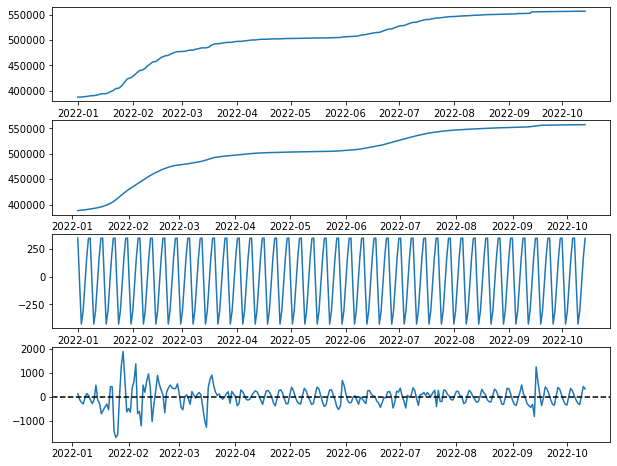

In [226]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10,8))

ax1.plot(decomp.observed)
ax2.plot(decomp.trend)
ax3.plot(decomp.seasonal)
ax4.plot(CasosConfirmados.index, decomp.resid)
ax4.axhline(0, linestyle='dashed', c='black')
plt.show()